In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Task1. Data set 설명
- 비트코인의 가격예측(financial data만!)
- 예측을 최대한 해보고
- 만약 안 된다면? 실물변수 추가
- 주요 궁금증: crypto는 실물경제와 상관이 있는가?
- FRED

```
BTC: btc price
DFF:federal funds effective rate
BBB: BBB firm interest rate
SP500: SP500 index
SP5003MONVOl: SP500 3month voltality
DAA: AA firm interest rate
WTI: WTI oil price
EFFR: effective federal funds rate
OBFR: overnight bank funding rate
T10Y2Y: 10-Year Treasury - 2Y
FORWARD1
FORWARD10
TERMPREMIUM10: term premium on 10 year zero coupon bond

```

In [40]:
file1 = r"C:\Users\kihun\Desktop\python_workspace\EPOCH\mini_project\dataset\NEW1.csv"
file2 = r"C:\Users\kihun\Desktop\python_workspace\EPOCH\mini_project\dataset\NEW2.csv"
file3 = r"C:\Users\kihun\Desktop\python_workspace\EPOCH\mini_project\dataset\NEW3.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# 날짜 컬럼을 기준으로 병합 (outer join을 사용하여 모든 날짜 포함)
df = pd.merge(df1, df2, on='observation_date', how='inner')
df = pd.merge(df, df3, on='observation_date', how='inner')

print(df.head())

  observation_date     BTC   DFF   BBB    SP500  SP5003MONVOL  DAAA    WTI  \
0       2016-03-01  433.08  0.36  4.39  1978.35         20.28  3.91  34.39   
1       2016-03-02  420.39  0.37  4.37  1986.45         19.92  3.90  34.57   
2       2016-03-03  418.80  0.37  4.33  1993.40         19.49  3.89  34.56   
3       2016-03-04  407.35  0.36  4.34  1999.99         19.63  3.92  35.91   
4       2016-03-07  412.21  0.36  4.32  2001.76         19.90  3.91  37.90   

   EFFR  OBFR  T10Y2Y  FORWARD1  FORWARD10  TERMPREMIUM10  
0  0.36  0.37    0.98    0.9302     3.1401        -0.0103  
1  0.37  0.37    0.99    0.9546     3.1719         0.0068  
2  0.37  0.37    0.98    0.9469     3.1636         0.0105  
3  0.36  0.37    1.00    0.9863     3.2000         0.0355  
4  0.36  0.37    1.00    1.0200     3.2255         0.0518  


In [42]:
df.head()

,observation_date,BTC,DFF,BBB,SP500,SP5003MONVOL,DAAA,WTI,EFFR,OBFR,T10Y2Y,FORWARD1,FORWARD10,TERMPREMIUM10
0,2016-03-01,433.08,0.36,4.39,1978.35,20.28,3.91,34.39,0.36,0.37,0.98,0.9302,3.1401,-0.0103
1,2016-03-02,420.39,0.37,4.37,1986.45,19.92,3.90,34.57,0.37,0.37,0.99,0.9546,3.1719,0.0068
2,2016-03-03,418.80,0.37,4.33,1993.40,19.49,3.89,34.56,0.37,0.37,0.98,0.9469,3.1636,0.0105
3,2016-03-04,407.35,0.36,4.34,1999.99,19.63,3.92,35.91,0.36,0.37,1.00,0.9863,3.2000,0.0355
4,2016-03-07,412.21,0.36,4.32,2001.76,19.90,3.91,37.90,0.36,0.37,1.00,1.0200,3.2255,0.0518


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2359 non-null   object 
 1   BTC               2358 non-null   float64
 2   DFF               2358 non-null   float64
 3   BBB               2331 non-null   float64
 4   SP500             2274 non-null   float64
 5   SP5003MONVOL      2271 non-null   float64
 6   DAAA              2260 non-null   float64
 7   WTI               2259 non-null   float64
 8   EFFR              2270 non-null   float64
 9   OBFR              2270 non-null   float64
 10  T10Y2Y            2261 non-null   float64
 11  FORWARD1          2256 non-null   float64
 12  FORWARD10         2256 non-null   float64
 13  TERMPREMIUM10     2256 non-null   float64
dtypes: float64(13), object(1)
memory usage: 258.1+ KB


In [44]:
print(df.isnull().sum())
# 결측치가 다소 있음... 그냥 빼주자
df = df.dropna()

observation_date      0
BTC                   1
DFF                   1
BBB                  28
SP500                85
SP5003MONVOL         88
DAAA                 99
WTI                 100
EFFR                 89
OBFR                 89
T10Y2Y               98
FORWARD1            103
FORWARD10           103
TERMPREMIUM10       103
dtype: int64


In [45]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2242 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2242 non-null   object 
 1   BTC               2242 non-null   float64
 2   DFF               2242 non-null   float64
 3   BBB               2242 non-null   float64
 4   SP500             2242 non-null   float64
 5   SP5003MONVOL      2242 non-null   float64
 6   DAAA              2242 non-null   float64
 7   WTI               2242 non-null   float64
 8   EFFR              2242 non-null   float64
 9   OBFR              2242 non-null   float64
 10  T10Y2Y            2242 non-null   float64
 11  FORWARD1          2242 non-null   float64
 12  FORWARD10         2242 non-null   float64
 13  TERMPREMIUM10     2242 non-null   float64
dtypes: float64(13), object(1)
memory usage: 262.7+ KB
None
observation_date    0
BTC                 0
DFF                 0
BBB                 

# Task2. 기초 통계 확인

In [46]:
df.describe()

,BTC,DFF,BBB,SP500,SP5003MONVOL,DAAA,WTI,EFFR,OBFR,T10Y2Y,FORWARD1,FORWARD10,TERMPREMIUM10
count,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000,2242.000000
mean,24197.360245,2.039750,4.090629,3576.539255,20.340687,3.787293,64.367440,2.039750,2.032917,0.357716,2.290163,3.490152,0.054054
std,24388.225083,1.897887,1.202937,1080.215890,6.693599,0.894495,18.181633,1.897887,1.896660,0.600296,1.582525,0.911761,0.313772
min,407.350000,0.040000,2.050000,1978.350000,11.850000,2.010000,-36.980000,0.040000,0.030000,-1.080000,0.086900,1.583800,-0.658700
25%,6272.382500,0.370000,3.280000,2695.307500,15.600000,3.040000,50.847500,0.370000,0.370000,0.030000,0.926750,2.852425,-0.133500
50%,12016.150000,1.550000,3.860000,3366.080000,18.425000,3.790000,64.450000,1.550000,1.545000,0.315000,1.894400,3.451550,0.081700
75%,39165.012500,3.830000,5.280000,4365.217500,23.522500,4.510000,76.105000,3.830000,3.820000,0.840000,3.855850,3.933725,0.289225
max,106136.990000,5.330000,6.720000,6144.150000,72.980000,5.800000,123.640000,5.330000,5.330000,1.590000,5.161500,5.700400,0.813100


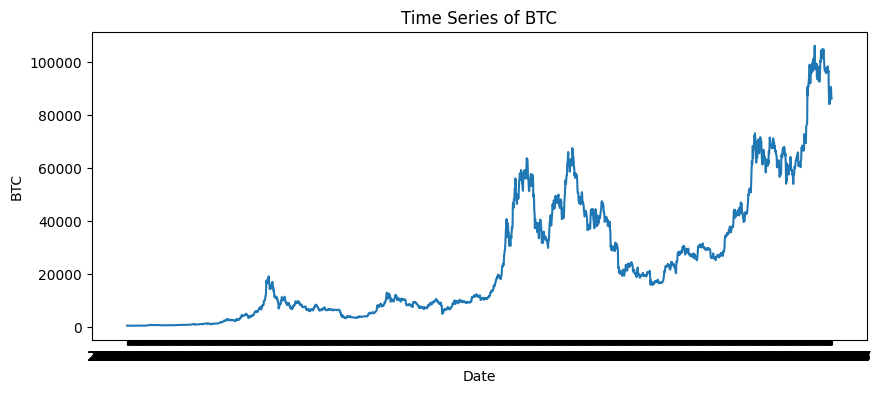

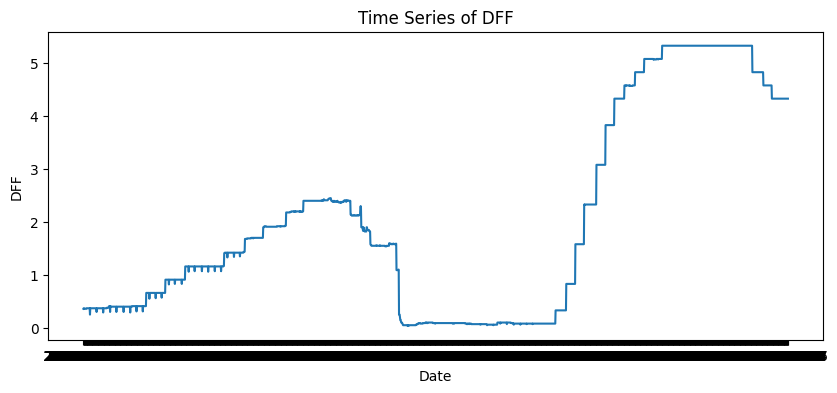

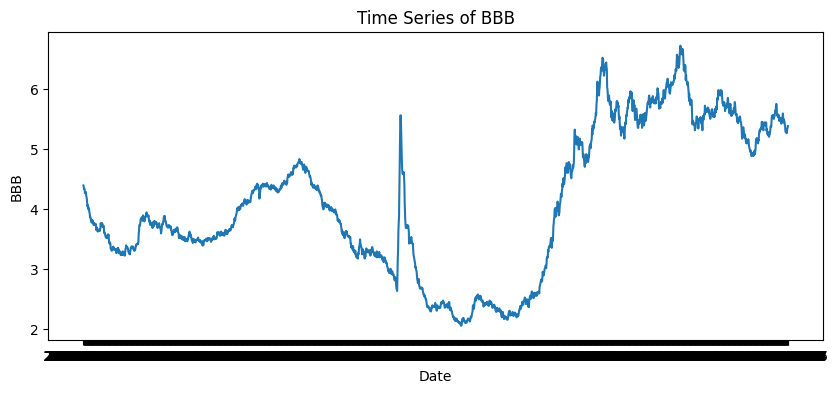

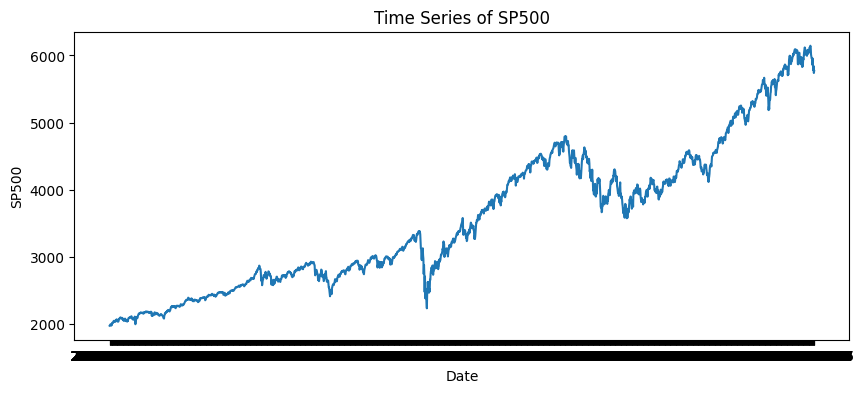

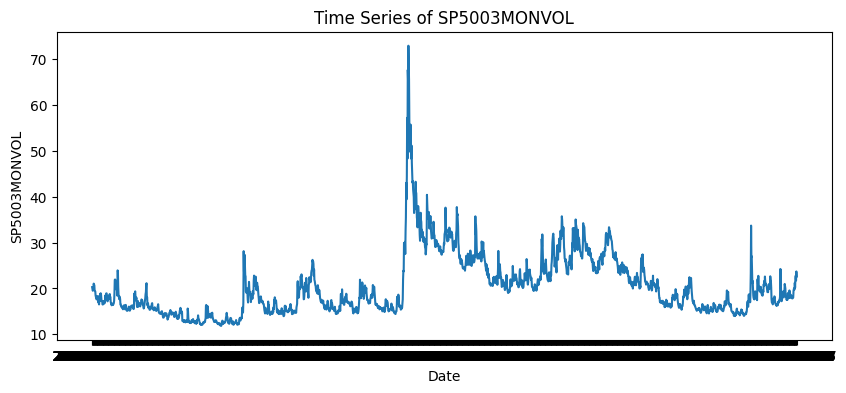

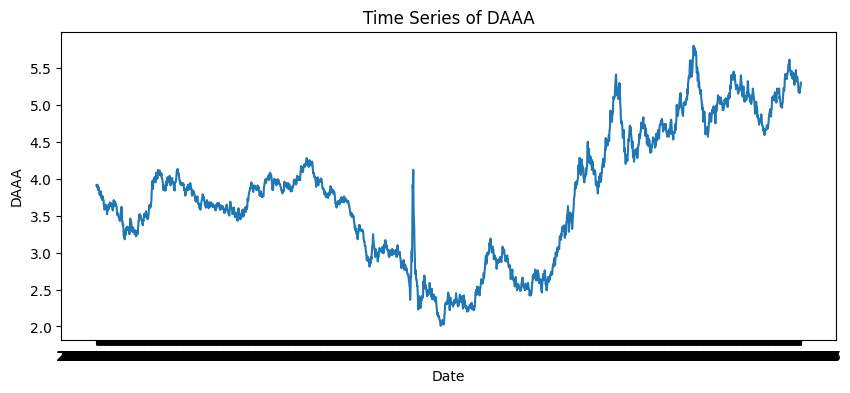

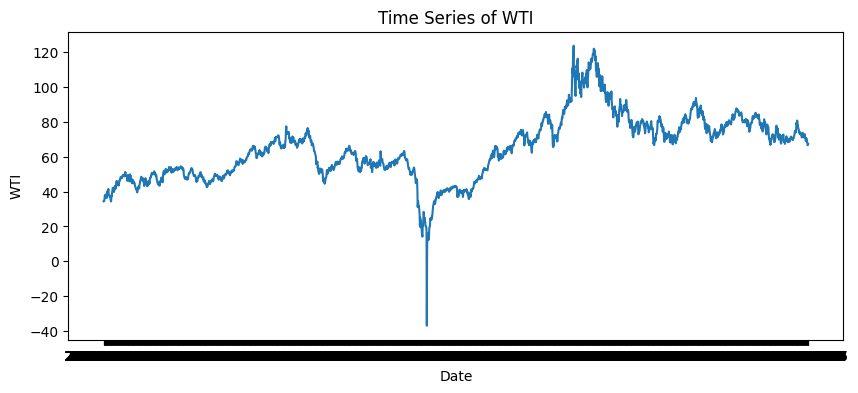

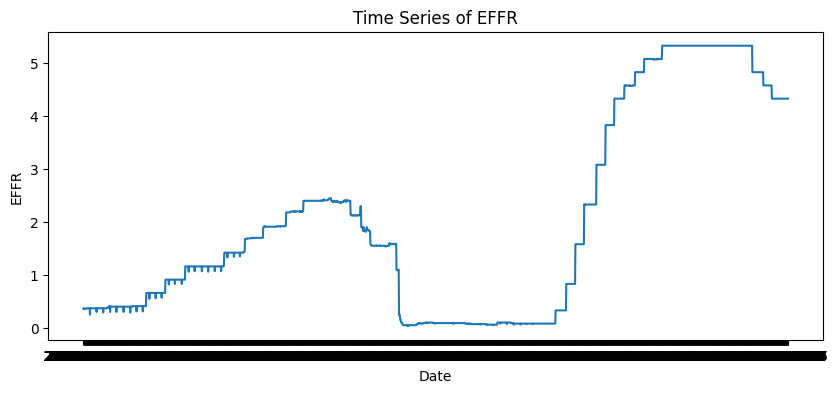

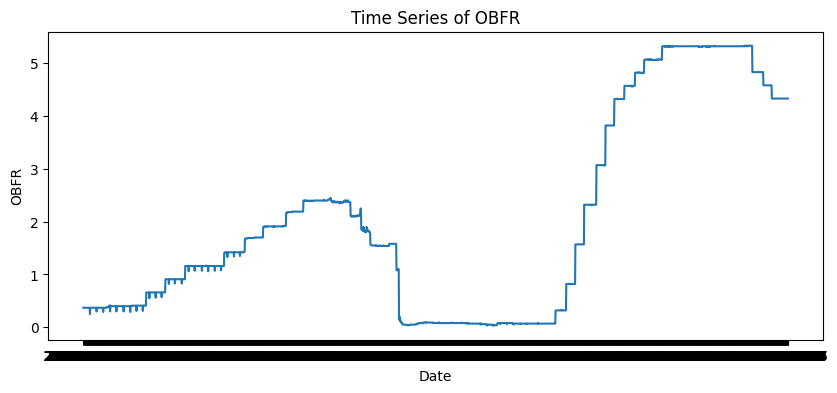

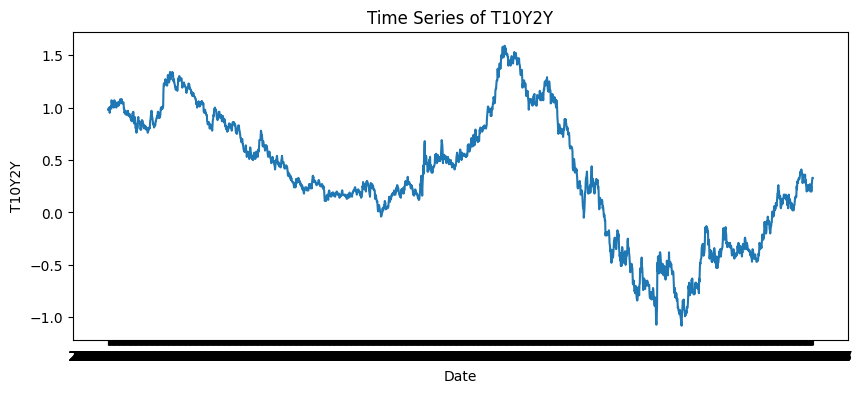

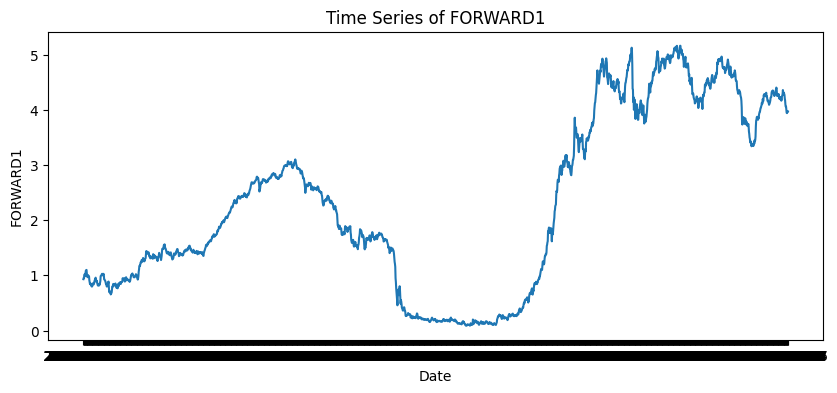

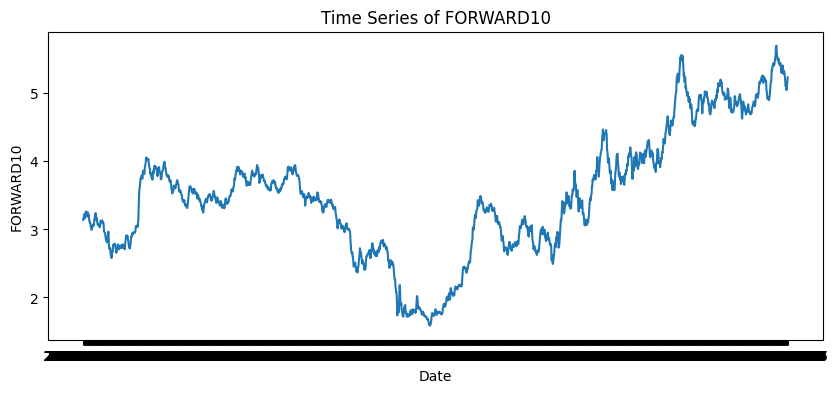

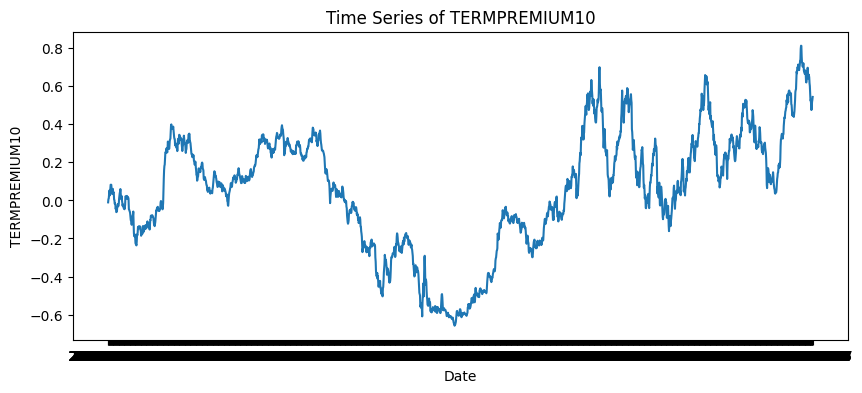

In [47]:
# observation_date를 인덱스로 설정 (이미 datetime 형식이라 가정)
df.set_index('observation_date', inplace=True)

# 각 컬럼에 대해 시계열 선 그래프 그리기
for col in df.columns:
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df[col])
    plt.title(f'Time Series of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()

# Task3. 분석 목적 및 인사이트

- 중반부(2020년)까진 큰 연동성 발견 x
- 그러나 20년 이후로 회사채 금리 및 fed rate와 연동된 움직임 보임
- 특히 금리 스프레드가 20년 이후 급격히 하락 후 반등(경기 침체 예상 후 호황 예상) -> 비트코인도 동일 양상으로 움직임
- 시장 기대에 특히 민감하게 반응하는 것으로 보임 (금리 스프레드 - 투자자산 간 연관성 vs "" - 비트코인 간 연관성?)
- 단기선도이자율은 코로나 이후 급등 후 높게 형성, 시장이 지속적으로 호황 예상하는 중
- 장기 선도 이자율은 꾸준히 증가 중
- 선도 이자율 - 비트코인 가격 변동량(미분값)?

- 분석 목적
  1. 금융 변수만으로 비트코인의 움직임을 설명해보자
  2. 금리 스프레드, 선도가 등 시장 기대와 비트코인 움직임 간의 연관성 파악 (어느 정도인지 타 자산과 비교)
  3. 실물 변수, 특히 총공급 측면의 변수(유가)가 유의미한 설명력을 지닐 수 있는가? (모델 성능을 개선할 수 있는가?)